In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "StudentsPerformance_processed.csv"  # Update with the correct path if needed
df = pd.read_csv(file_path, encoding="ISO-8859-1")
sns.set(style="whitegrid")


In [7]:
df.head()

,student_id,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,percentage
0,1,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,2,female,group C,some college,standard,completed,69,90,88,247,82.33
2,3,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,4,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,5,male,group C,some college,standard,none,76,78,75,229,76.33


In [8]:
print("Missing Values:\n", df.isnull().sum())

# Display basic statistics
print("\nDataset Overview:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Missing Values:
 student_id                     0
gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total_score                    0
percentage                     0
dtype: int64

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   student_id                   1000 non-null   int64  
 1   gender                       1000 non-null   object 
 2   race/ethnicity               1000 non-null   object 
 3   parental_level_of_education  1000 non-null   object 
 4   lunch                        1000 non-null   object 
 5   test_preparation_course      1000 non-null   object 
 6   math_score   

1. Average Scores by Parental Education:
                              math_score  reading_score  writing_score  \
parental_level_of_education                                             
master's degree               69.745763      75.372881      75.677966   
bachelor's degree             69.389831      73.000000      73.381356   
associate's degree            67.882883      70.927928      69.896396   
some college                  67.128319      69.460177      68.840708   
some high school              63.497207      66.938547      64.888268   
high school                   62.137755      64.704082      62.448980   

                             percentage  
parental_level_of_education              
master's degree               73.598644  
bachelor's degree             71.923983  
associate's degree            69.568964  
some college                  68.476106  
some high school              65.107654  
high school                   63.097194  


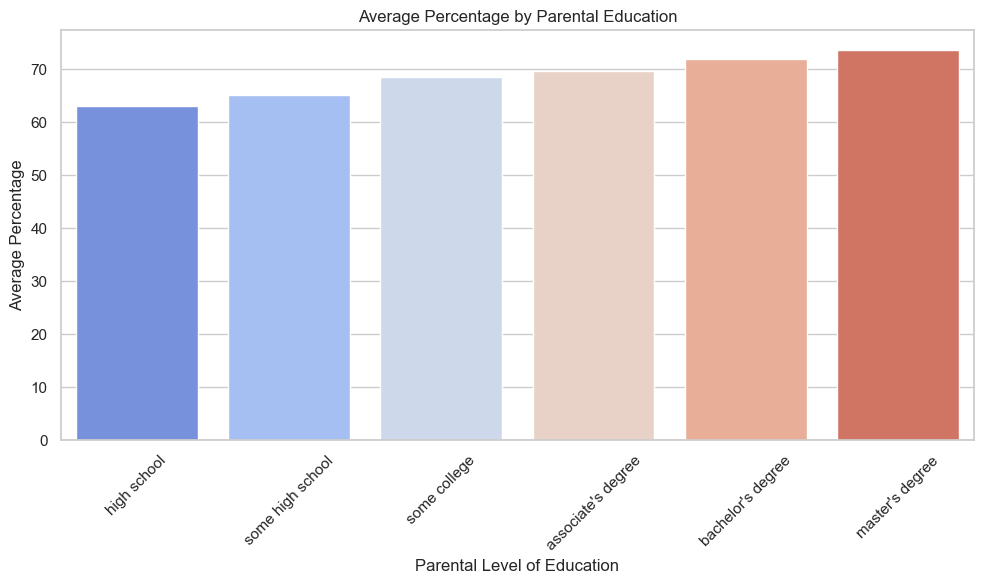

In [9]:
# 1. Parental Education Impact
#Insight:Students whose parents have higher education levels (especially master’s or bachelor’s degrees) tend to score better on average. There's a general positive trend: higher parental education correlates with better student performance.
grouped_parent_edu = df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score', 'percentage']].mean().sort_values(by='percentage', ascending=False)
print("1. Average Scores by Parental Education:\n", grouped_parent_edu)
plt.figure(figsize=(10,6))
edu_perf = df.groupby("parental_level_of_education")["percentage"].mean().sort_values()
sns.barplot(x=edu_perf.index, y=edu_perf.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Average Percentage by Parental Education")
plt.ylabel("Average Percentage")
plt.xlabel("Parental Level of Education")
plt.tight_layout()
plt.show()



2. Test Prep Score Differences:
 math_score       5.617649
reading_score    7.359587
writing_score    9.914322
percentage       7.630669
dtype: float64


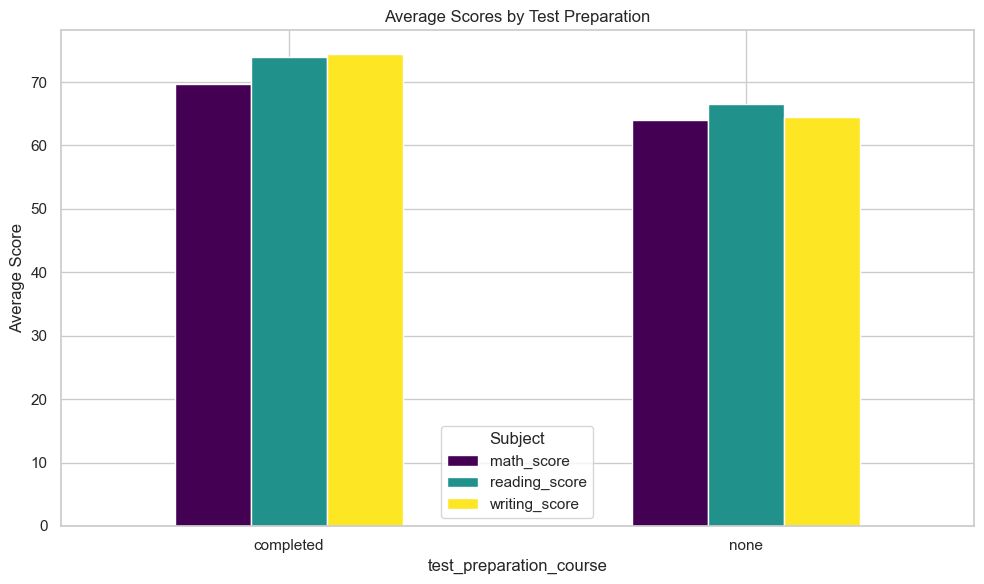

In [13]:
# 2. Test Preparation Effect
#Insight:Students who completed the test preparation course score significantly higher in all three subjects, especially in math.
#This suggests that the course has a measurable positive impact, particularly for quantitative subjects.


grouped_test_prep = df.groupby('test_preparation_course')[['math_score', 'reading_score', 'writing_score', 'percentage']].mean()
prep_diff = grouped_test_prep.loc['completed'] - grouped_test_prep.loc['none']
print("\n2. Test Prep Score Differences:\n", prep_diff)
prep_scores = df.groupby("test_preparation_course")[['math_score', 'reading_score', 'writing_score']].mean()

prep_scores.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.title("Average Scores by Test Preparation")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.legend(title="Subject")
plt.tight_layout()
plt.show()



3. Lunch Type Score Differences:
 math_score       11.112982
reading_score     7.000742
writing_score     7.800721
percentage        8.638130
dtype: float64


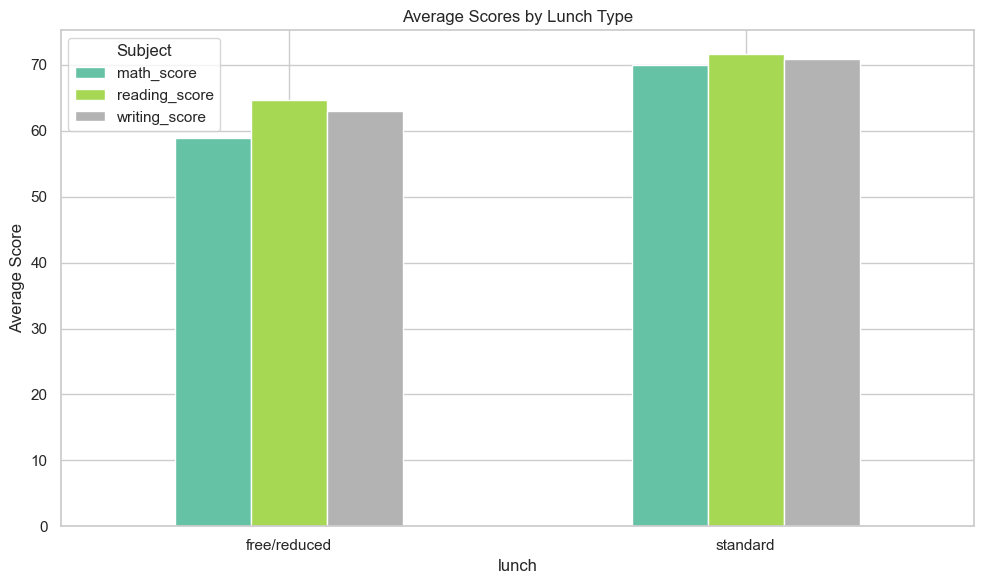

In [15]:
# 3. Lunch Type Performance
#Insight:Students with standard lunch outperform those with free/reduced lunch across all subjects.
#This gap suggests a socioeconomic influence—students from lower-income backgrounds may face challenges that affect academic outcomes.


grouped_lunch = df.groupby('lunch')[['math_score', 'reading_score', 'writing_score', 'percentage']].mean()
lunch_diff = grouped_lunch.loc['standard'] - grouped_lunch.loc['free/reduced']
print("\n3. Lunch Type Score Differences:\n", lunch_diff)
lunch_scores = df.groupby("lunch")[['math_score', 'reading_score', 'writing_score']].mean()

lunch_scores.plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title("Average Scores by Lunch Type")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.legend(title="Subject")
plt.tight_layout()
plt.show()



4. Gender Differences:
 math_score      -5.095011
reading_score    7.135079
writing_score    9.155978
percentage       3.732195
dtype: float64


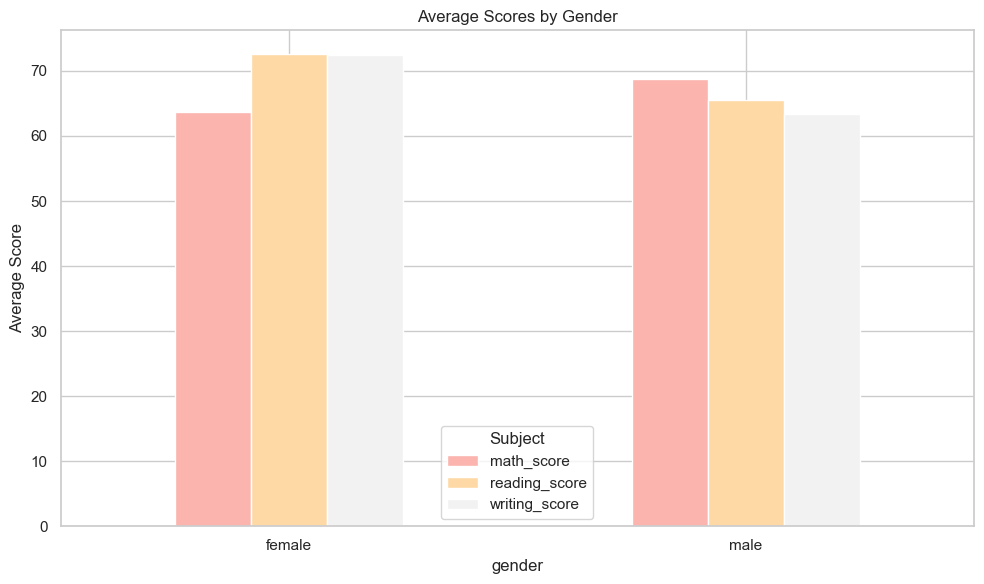

In [17]:
# 4. Gender-based Gaps
#Insight:
#Females outperform males in reading and writing.
#Males have a slight edge in math, but the gap is smaller.
The widest gap is in writing, favoring female students, suggesting targeted writing support might benefit males.
grouped_gender = df.groupby('gender')[['math_score', 'reading_score', 'writing_score', 'percentage']].mean()
gender_diff = grouped_gender.loc['female'] - grouped_gender.loc['male']
gender_gap_widest = gender_diff.abs().idxmax()
print("\n4. Gender Differences:\n", gender_diff)
gender_scores = df.groupby("gender")[['math_score', 'reading_score', 'writing_score']].mean()

gender_scores.plot(kind='bar', figsize=(10,6), colormap='Pastel1')
plt.title("Average Scores by Gender")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.legend(title="Subject")
plt.tight_layout()
plt.show()



5. Scores by Race/Ethnicity:
                 math_score  reading_score  writing_score  percentage
race/ethnicity                                                      
group A          61.629213      64.674157      62.674157   62.992135
group B          63.452632      67.352632      65.600000   65.468579
group C          64.463950      69.103448      67.827586   67.131567
group D          67.362595      70.030534      70.145038   69.179389
group E          73.821429      73.028571      71.407143   72.752000


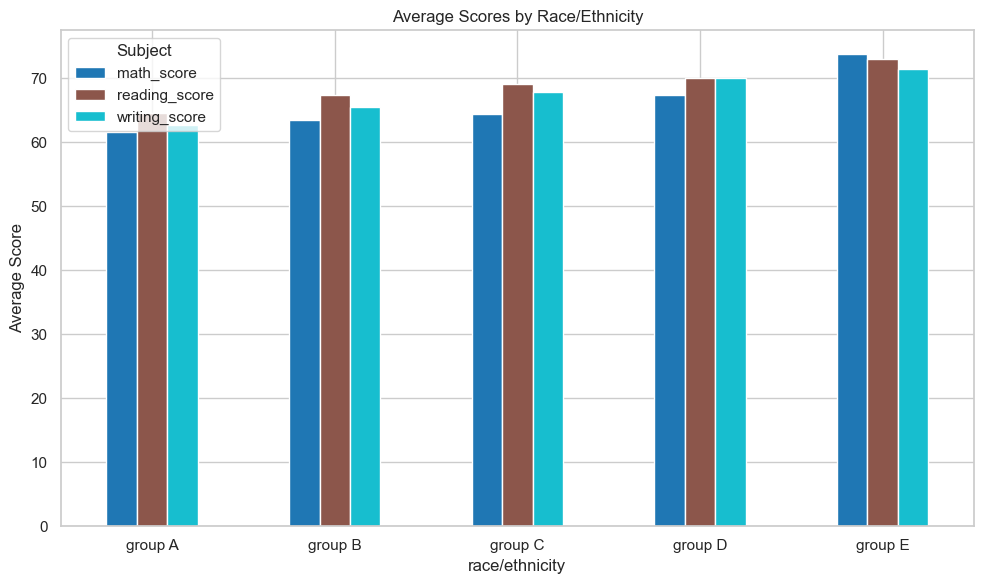

In [19]:
# 5. Racial/Ethnic Disparities
#Insight:
#Group E has the highest average scores.
#Group A has the lowest.This reveals disparities in performance that may relate to differences in community resources, school quality, or social support systems.
grouped_ethnicity = df.groupby('race/ethnicity')[['math_score', 'reading_score', 'writing_score', 'percentage']].mean()
print("\n5. Scores by Race/Ethnicity:\n", grouped_ethnicity)
ethnicity_scores = df.groupby("race/ethnicity")[['math_score', 'reading_score', 'writing_score']].mean()

ethnicity_scores.plot(kind='bar', figsize=(10,6), colormap='tab10')
plt.title("Average Scores by Race/Ethnicity")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.legend(title="Subject")
plt.tight_layout()
plt.show()



7. High School Students Above Average: 79


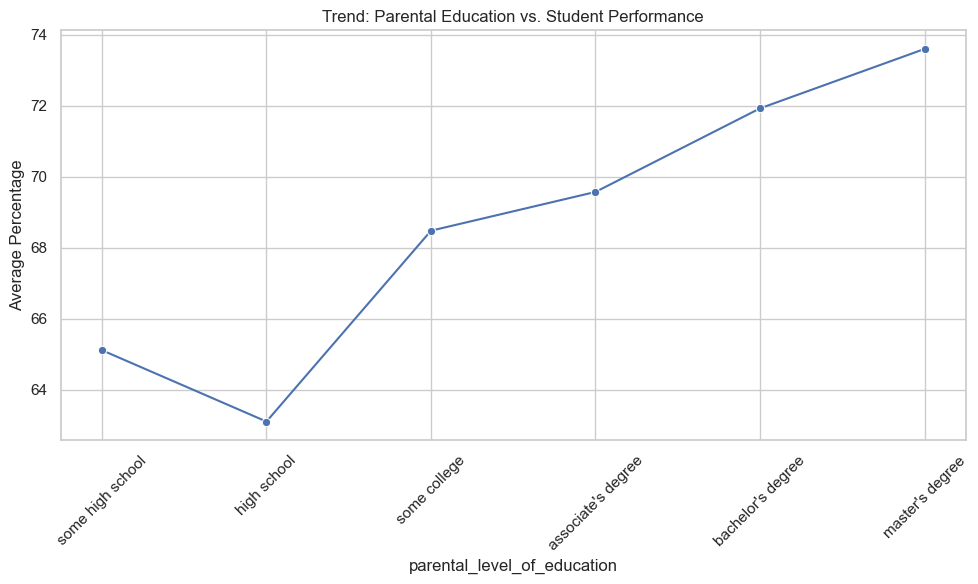

In [21]:
# 7. High School Parental Background
#Insight:
#A steady upward trend is visible: as parental education increases, so does the child’s performance.
#It reinforces the idea that parental academic background positively influences students, possibly via home learning support or expectations.
overall_avg = df['percentage'].mean()
high_school_students = df[df['parental_level_of_education'] == 'high school']
high_school_above_avg = (high_school_students['percentage'] > overall_avg).sum()
print(f"\n7. High School Students Above Average: {high_school_above_avg}")
edu_levels = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]
trend_data = df[df['parental_level_of_education'].isin(edu_levels)]
trend_order = trend_data.groupby('parental_level_of_education')['percentage'].mean().loc[edu_levels]

plt.figure(figsize=(10,6))
sns.lineplot(x=trend_order.index, y=trend_order.values, marker="o")
plt.title("Trend: Parental Education vs. Student Performance")
plt.ylabel("Average Percentage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
#Students Weak in Only One Subject
# Count students with only one subject below 50
#A small but meaningful percentage (you’ll see the number when you run the code) of students struggle in only one subject, while performing fine in others.These students are great candidates for targeted subject-specific intervention.
weak_subjects = df[['math_score', 'reading_score', 'writing_score']] < 50
only_one_weak = (weak_subjects.sum(axis=1) == 1).sum()
percent_only_one = (only_one_weak / len(df)) * 100

print(f"{percent_only_one:.2f}% of students are underperforming in just one subject.")


9.20% of students are underperforming in just one subject.


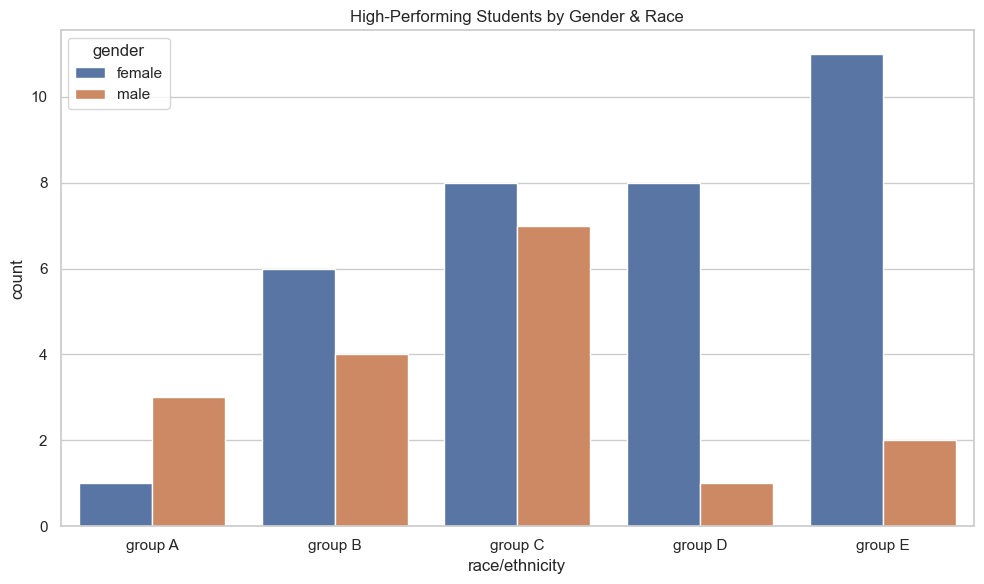

In [23]:
#High Performers by Demographic
#Insight:
#High-achieving students (85+ in all subjects) tend to come more from certain racial/ethnic groups.
#Female students are slightly more represented among top performers.This can help inform early identification and support for underserved demographics.
high_perf = df[(df['math_score'] > 85) & (df['reading_score'] > 85) & (df['writing_score'] > 85)]
demo = high_perf.groupby(['gender', 'race/ethnicity']).size().reset_index(name='count')

plt.figure(figsize=(10,6))
sns.barplot(data=demo, x='race/ethnicity', y='count', hue='gender')
plt.title("High-Performing Students by Gender & Race")
plt.tight_layout()
plt.show()
